# LinearRegression (Regressão Linear)

É um modelo amplamente utilizado em econometria, e tipo mais simples de regressão. Estabelece uma linha de tendência que melhor se ajusta ao conjunto de dados utilizado, que pode ser tanto bidimensional (x -> f(x)) quanto assumir n-dimensões (x,y,...) -> f(x,y,...).

Equação da Regressão Linear: $$y_{i} = \alpha + \beta X + \epsilon$$
* alpha: intercepto da regressão (coeficiente linear da reta) -> ponto que corta o eixo Y
* beta: inclinação da regressão (coeficiente angular da reta) -> efeito causado em Y com o aumento em X de uma unidade
* epsilon: resíduos (termo de erro que assume uma distribuição normal com média zero e variância constante)

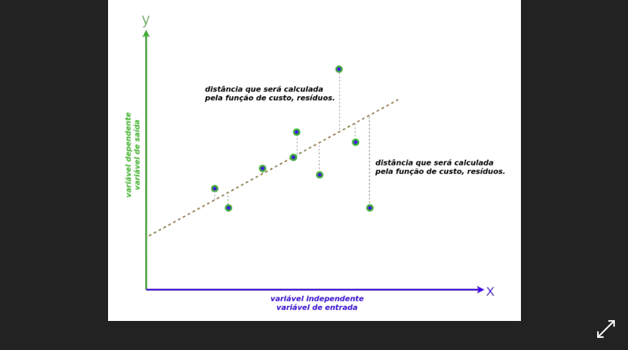

O método utilizado para estimar a regressão linear é denominado Método dos Mínimos Quadrados Ordinários (OLS), que busca encontrar a equação da reta que minimiza a soma dos quadrados dos resíduos de uma regressão.

$$f(\alpha, \beta) = min(\sum{\epsilon^2}) = min(\sum{y_{i} - \alpha - \beta x_{i}})$$

Ao derivar a função da direita em relação a X, obteremos duas condições de primeira ordem (CPO) que permitem isolar os valores para os estimadores de alfa e beta (a e b), encontrando um mínimo global para a soma dos quadrados dos resíduos. 

$$\frac{\partial f(\alpha, \beta)}{\partial \alpha} = 0; \frac{\partial f(\alpha, \beta)}{\partial \beta} = 0$$

**Obs.:** Estimadores são valores que permitem estimar o valor da estatística de uma população, a partir de um conjunto de amostras. Ex: média amostral é um estimador eficiente para a média populacional, mas eles não necessariamente são os mesmos dado que às vezes é impossível realizar cálculos com toda a população. 

Dado o pressuposto de normalidade, assumimos que ambos os estimadores seguem uma distribuição normal com média e variância definidas por:

$$a = N(\alpha, \sigma^2 (\frac{1}{n} + \frac{\bar{X^2}}{\sum{x_{i}^2}})); a = \bar{Y} - b \bar{X} $$
$$b = N(\beta, \frac{\sigma^2}{\sum{x_{i}^2}}); b = \rho_{X,Y} * \frac{\sigma_{y}}{\sigma_{x}}$$

Em posse da variância e do desvio-padrão dos estimadores, podemos realizar testes de hipótese para verificar se o valor estimado para alpha e beta segue uma distribuição Normal ou t-Student com média zero (sendo estatísticamente igual a zero), e analisar a qualidade do modelo.

Logo se P(>| t |) < 0.05, rejeitamos a hipotese nula de que o coeficiente é estatisticamente igual a zero.

Coeficientes que não são estatisticamente significantes tendem a gerar ruído no modelo, e não devem ser mantidos pois não apresentam relação linear com a variável explicada.

### Variáveis Dummy

São variáveis binárias que assumem os valores de 0 ou 1, conforme a ocorrência de um evento. Podemos incluí-las para analisar a influência de uma variável categórica em um modelo, sendo que quando ela assume 0 seu coeficiente é zerado e quando ela assume 1 passa a influenciar Y em "beta" unidades. 

### Testes de Hipótese para Pré-Processamento dos Dados:

Pressupostos iniciais para se obter uma boa regressão:

* Existência de relação linear entre x e y (forte correlação, tanto positiva quanto negativa)
* Ausência de correlação entre as variáveis explicativas (X's)
* Variância constante na distribuição dos resíduos (Homocedasticidade - BP ou GQ < 0.05)
* Ausência de correlação entre os resíduos e seus valores anteriores (Correlação Serial - BG, DW ou BP < 0.05)
* Resíduos seguem uma distribuição normal (Jarque-Bera < 0.05)

Outros testes importantes (a P-valor < 0.05):

* Chow -> modelo não apresenta quebra estrutural
* Teste-F -> modelo restrito é tão bom quanto o irrestrito
* RESET -> não há melhores formas funcionais para modelagem da regressão

### R-quadrado (R^2)

Também conhecido como o Coeficiente de Determinação, é a principal medida da qualidade de uma regressão em seu ajuste ao conjunto de dados, permitindo comparar regressões. Varia entre 0 e 1, sendo que em 0 assumimos que X e Y são linearmente independentes e em 1 assumimos que X e Y possuem dependência linear perfeita, sendo assim, toda a variação em Y é explicada pelas variações em X.

$$TSS = ESS + RSS$$
$$R^2 = \frac{ESS}{TSS} = 1 - \frac{RSS}{TSS}$$

Sendo que:
* TSS = Soma dos Quadrados Totais

$$TSS = (\sum{y_{i}-\bar{y}})^2$$

* ESS = Soma dos Quadrados Explicada pelo modelo

$$ESS = (\sum{\hat{y_{i}}-\bar{y}})^2$$

* RSS = Soma dos Quadrados dos Resíduos

$$RSS = (\sum{\epsilon^2})$$

Outra métrica de avaliação interessante é o **R^2 Ajustado**, cuja avaliação é preferível em regressões lineares múltiplas, porém possui mesma interpretação do R^2 normal. Ele estabelece um peso negativo para a existência de variáveis que não apresentam coeficientes estatisticamente significantes.

# Construindo o Algoritmo

### Importação das Bibliotecas e Manipulação dos Dados

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Manipular dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../dados/boston_houses.csv")
df.drop(df.columns[0], axis = 1, inplace = True)

X = df.drop("MEDV", axis = 1)
y = df["MEDV"] # Alvo Contínuo: valor mediano das casas em uma vizinhança

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Ajuste do Modelo

In [3]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
y_pred_train = modelo.predict(X_train)

In [4]:
# Obtendo os coeficientes
modelo.coef_

array([-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,  2.77350326e+00,
       -1.62388292e+01,  4.36875476e+00, -9.24808158e-03, -1.40086668e+00,
        2.57761243e-01, -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
       -5.17639519e-01])

In [5]:
# Obtendo o intercepto
modelo.intercept_

29.836420163839083

### Gráfico de uma Regressão Univariada

**ATENÇÃO:** Essa NÃO é a regressão estimada pelo modelo. A função geradora do gráfico por si só estima uma regressão entre duas variáveis (X e Y) e plota os resultados. Isso foi incluído pois pode ser útil.

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

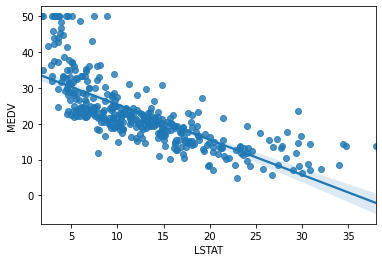

In [14]:
sns.regplot(x = X_train["LSTAT"], y = y_train)

### Métricas de Avaliação

In [7]:
# R-Quadrado
print(r2_score(y_train, y_pred_train)) 
print(modelo.score(X_train, y_train))

0.748087259862344
0.748087259862344


In [8]:
# Erro Absoluto Médio
print(mean_absolute_error(y_test, y_pred))

3.060939595437056


In [12]:
# Raiz do Erro Quadrático Médio (RMSE)
mean_squared_error(y_test, y_pred, squared = False)

4.700924890603771

Uma medida interessante para se calcular a eficácia do modelo é calcular a relação proporcional entre o MAE e a média dos valores da variável independente (y) no conjunto de teste, que pode ser interpretado como a distância média entre os valores previstos e a média do conjunto de valores observados. 

Resultados razoáveis devem ser abaixo de 10%.

In [10]:
# MAE / Média do conjunto de teste
mean_absolute_error(y_test, y_pred)/y_test.mean()

0.1429451474978879